# Intern : Yash More 

Task No.2 - Employee Turnover Prediction using Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [4]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no any null values in the dataset.

In [5]:
data.shape

(1470, 35)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In all there are 35 variables , 9 of them are having string datatype and remaining 26 variables are integers of which some are categorical variables represented in integer format.

Data Visualization And Exploratory Data Analysis

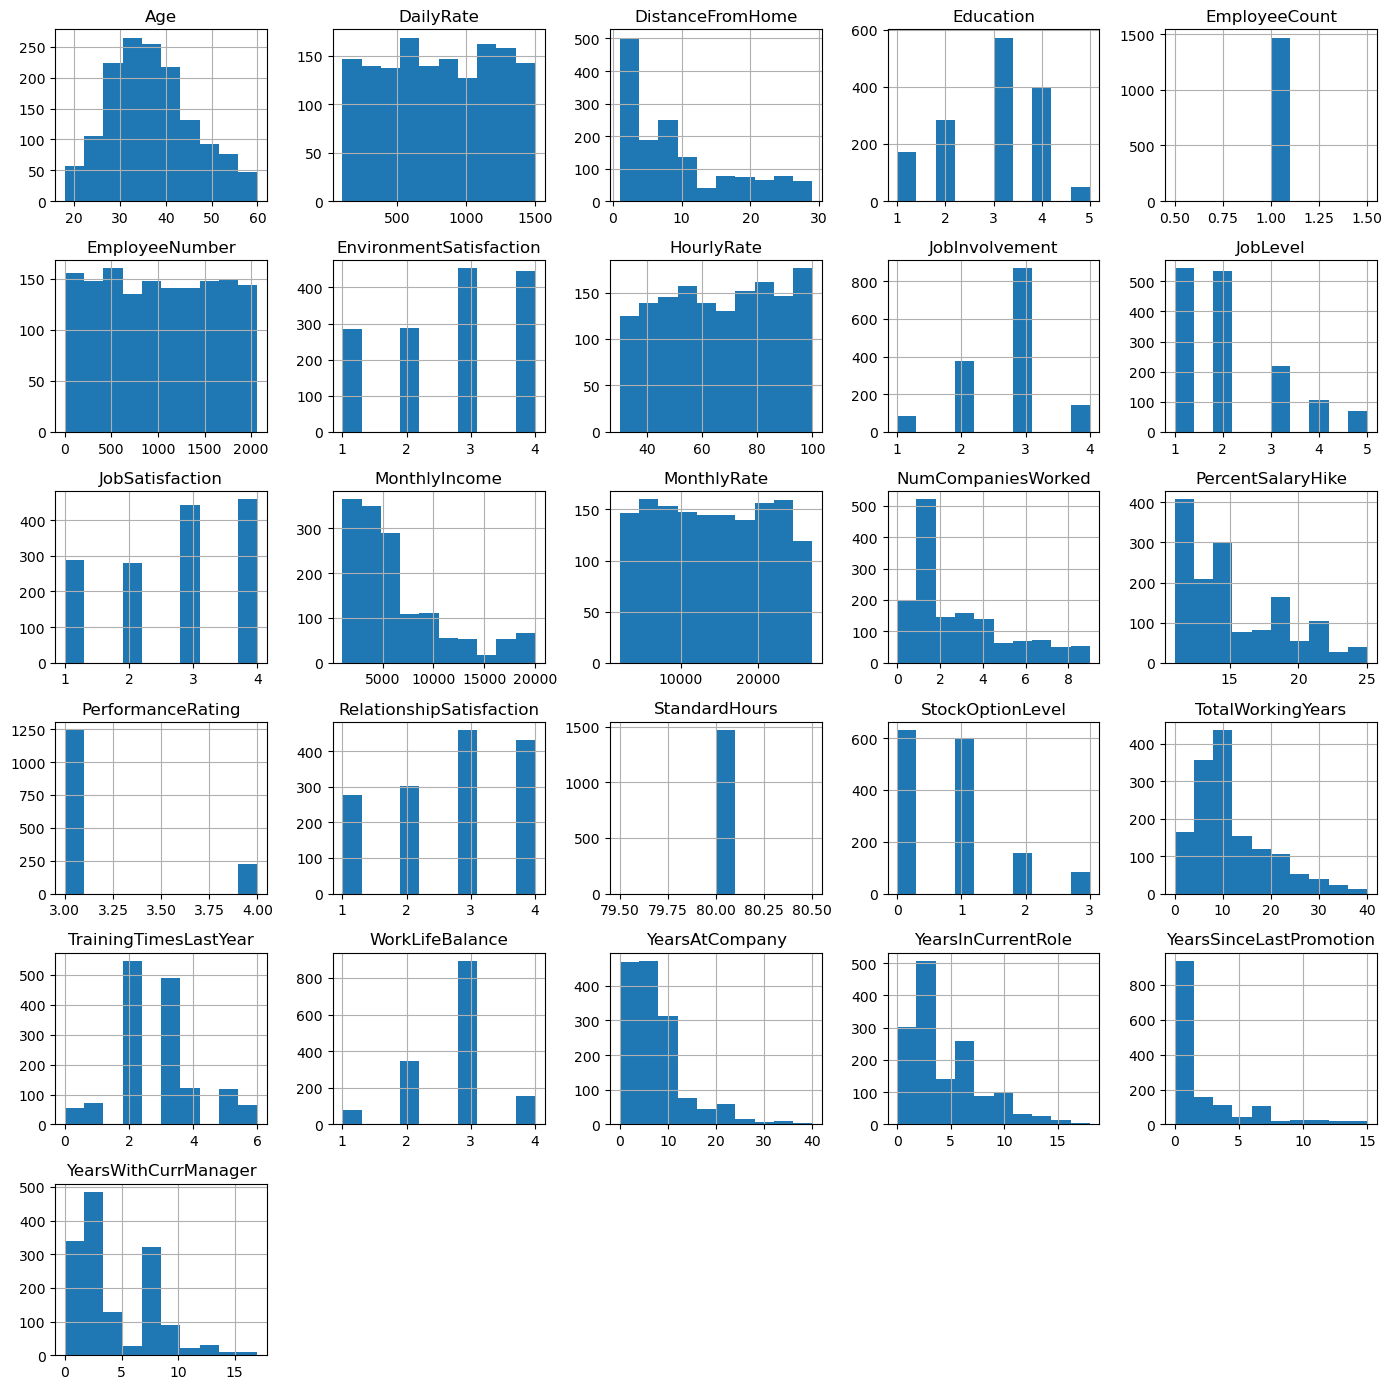

In [7]:
data.hist(figsize=(14,14))
plt.tight_layout()
plt.show()

From the above plots most of the features are positively skewed(DistanceFromHome, MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCorrentRole,YearsSinceLastPromotion,YearsWithCurrManager). The Age feature is about symmetrical and most of the employees age is between 25-42. The feature such as EmployeeeCount and StandardHours are constant so we can remove them.

In [8]:
df=data.copy()

In [9]:
#To display the features that are actually the categorical variables but displayed as the object.
df.Attrition=pd.Categorical(df.Attrition)
df.BusinessTravel=pd.Categorical(df.BusinessTravel)
df.Department=pd.Categorical(df.Department)
df.Gender=pd.Categorical(df.Gender)
df.OverTime=pd.Categorical(df.OverTime)
df.JobRole=pd.Categorical(df.JobRole)
df.Over18=pd.Categorical(df.Over18)
df.MaritalStatus=pd.Categorical(df.MaritalStatus)
df.EducationField=pd.Categorical(df.EducationField)

In [10]:
#To display the features that are actually the categorical variables but displayed as the integers.
df.Education[df.Education==1]="Below College"
df.Education[df.Education==2]="College"
df.Education[df.Education==3]="Bachelor"
df.Education[df.Education==4]="Master"
df.Education[df.Education==5]="Doctor"

df.Education=pd.Categorical(df.Education)

df.EnvironmentSatisfaction[df.EnvironmentSatisfaction==1]="Low"
df.EnvironmentSatisfaction[df.EnvironmentSatisfaction==2]="Medium"
df.EnvironmentSatisfaction[df.EnvironmentSatisfaction==3]="High"
df.EnvironmentSatisfaction[df.EnvironmentSatisfaction==4]="Very High"

df.EnvironmentSatisfaction=pd.Categorical(df.EnvironmentSatisfaction)

df.JobInvolvement[df.JobInvolvement==1]="Low"
df.JobInvolvement[df.JobInvolvement==2]="Medium"
df.JobInvolvement[df.JobInvolvement==3]="High"
df.JobInvolvement[df.JobInvolvement==4]="Very High"

df.JobInvolvement=pd.Categorical(df.JobInvolvement)

df.JobSatisfaction[df.JobSatisfaction==1]="Low"
df.JobSatisfaction[df.JobSatisfaction==2]="Medium"
df.JobSatisfaction[df.JobSatisfaction==3]="High"
df.JobSatisfaction[df.JobSatisfaction==4]="Very High"

df.JobSatisfaction=pd.Categorical(df.JobSatisfaction)

df.PerformanceRating[df.PerformanceRating==1]="Low"
df.PerformanceRating[df.PerformanceRating==2]="Good"
df.PerformanceRating[df.PerformanceRating==3]="Excellent"
df.PerformanceRating[df.PerformanceRating==4]="Outstanding"

df.PerformanceRating=pd.Categorical(df.PerformanceRating)

df.RelationshipSatisfaction[df.RelationshipSatisfaction==1]="Low"
df.RelationshipSatisfaction[df.RelationshipSatisfaction==2]="Medium"
df.RelationshipSatisfaction[df.RelationshipSatisfaction==3]="High"
df.RelationshipSatisfaction[df.RelationshipSatisfaction==4]="Very High"

df.RelationshipSatisfaction=pd.Categorical(df.RelationshipSatisfaction)

df.WorkLifeBalance[df.WorkLifeBalance==1]="Bad"
df.WorkLifeBalance[df.WorkLifeBalance==2]="Good"
df.WorkLifeBalance[df.WorkLifeBalance==3]="Better"
df.WorkLifeBalance[df.WorkLifeBalance==4]="Best"

df.WorkLifeBalance=pd.Categorical(df.WorkLifeBalance)

In [11]:
#To remove the columns that do not affect the dependent variable Attrition as they are constant.
print(df.EmployeeCount.value_counts())
print(df.EmployeeNumber.value_counts())
print(df.Over18.value_counts())
print(df.StandardHours.value_counts())

1    1470
Name: EmployeeCount, dtype: int64
1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64
Y    1470
Name: Over18, dtype: int64
80    1470
Name: StandardHours, dtype: int64


The variables EmployeeCount, Over18, StandardHours has only a unique value and the variable EmployeeNumber has 1470 unique values , so these features arent useful for us, so we need to drop them.

In [12]:
#To drop the unwanted variables
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis="columns",inplace=True)

In [13]:
df.shape

(1470, 31)

# Visualizing the target variable distribution among the dfset
import plotly.express as px
fig=px.pie(df,names='Attrition',title='Attrition',template='plotly_dark')
fig.update_traces(rotation=90,pull=[0.1],textinfo="percent+label")
fig.show()

83.9% of the total number of employees do not leave or resign of the job but 16.1% of the total employees resign the job.

In [14]:
#To code the categorical outcome Attrition which is a dependent variable
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Attrition']=label_encoder.fit_transform(df["Attrition"])
df["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [15]:
#To code the categorical independent variables using dummy variables
df1=pd.get_dummies(df,drop_first=True)
df1.head()

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,41,1,1102,1,94,2,5993,19479,8,11,...,0,1,1,0,1,0,0,0,0,0
1,49,0,279,8,61,2,5130,24907,1,23,...,1,0,0,1,0,0,1,0,1,0
2,37,1,1373,2,92,1,2090,2396,6,15,...,0,1,1,0,0,1,0,0,1,0
3,33,0,1392,3,56,1,2909,23159,1,11,...,1,0,1,0,0,0,0,0,1,0
4,27,0,591,2,40,1,3468,16632,9,12,...,1,0,0,0,0,0,1,0,1,0


In [16]:
#Create a column at the end of the dfframe that contains the same value as 'Age'
df1['Age_yrs']=df1['Age']
#Remove the first original column called 'AGE'
df1=df1.drop('Age',axis=1)
df1

,Attrition,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,MaritalStatus_Single,OverTime_Yes,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good,Age_yrs
0,1,1102,1,94,2,5993,19479,8,11,0,...,1,1,0,1,0,0,0,0,0,41
1,0,279,8,61,2,5130,24907,1,23,1,...,0,0,1,0,0,1,0,1,0,49
2,1,1373,2,92,1,2090,2396,6,15,0,...,1,1,0,0,1,0,0,1,0,37
3,0,1392,3,56,1,2909,23159,1,11,0,...,0,1,0,0,0,0,0,1,0,33
4,0,591,2,40,1,3468,16632,9,12,1,...,0,0,0,0,0,1,0,1,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,884,23,41,2,2571,12290,4,17,1,...,0,0,0,0,0,0,0,1,0,36
1466,0,613,6,42,3,9991,21457,4,15,1,...,0,0,0,1,0,0,0,1,0,39
1467,0,155,4,87,2,6142,5174,1,20,1,...,0,1,1,0,1,0,0,1,0,27
1468,0,1023,2,63,2,5390,13243,2,14,0,...,0,0,0,0,0,1,0,0,1,49


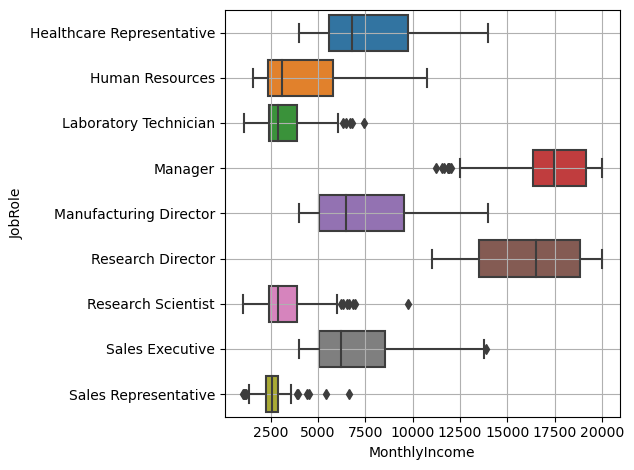

In [17]:
#To see whether Salary plays a important role in attrition
sns.boxplot(x=df["MonthlyIncome"] ,y=df["JobRole"])
plt.grid(True,alpha=1)
plt.tight_layout()
plt.show()

The employees at the post of Manager and Research Directors are having a high salary so there is no attrition among these employees. The Employees at the post of ResearchScientist, Laboratory Technician, Sales Representative, Human Sources have a very low monthly income so they are highly resigning the job.

# The process of data Splitting

In [18]:
#Splitting the dataset
x=df1.drop('Attrition',axis=1)
y=df1.Attrition

In [19]:
#Splitting data into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=4)
print('x train.size:',len(x_train))
print('x test.size:',len(x_test))
print('y train size:',len(y_train))
print('y test size:',len(y_test))

x train.size: 1176
x test.size: 294
y train size: 1176
y test size: 294


In [20]:
#Scaling of the continuos features
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
Scale_col=['Age_yrs','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion']
x_train[Scale_col]=Scaler.fit_transform(x_train[Scale_col])
x_test[Scale_col]=Scaler.transform(x_test[Scale_col])

In [21]:
print(y_train.value_counts())
print(y_test.value_counts())

0    982
1    194
Name: Attrition, dtype: int64
0    251
1     43
Name: Attrition, dtype: int64


It is observed that the target variable is highly imbalance, with much No values of Attrition than Yes.

The SMOTE Technique is used which creates synthetically more Yes values so that both class prefer equal distribution during training. I used oversampling of minor class since undersampling of major class may result in loss of relevant data.

In [22]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [23]:
#Using SMOTE Technique
from imblearn.over_sampling import SMOTE
x_train,y_train=SMOTE().fit_resample(x_train,y_train)

The technique has created the synthetic samples so that the target variable is completely balanced and we can perform further analysis.

In [24]:
#Logistic Regression
#To determine whether the employee leaves the job or not i.e. Attrition which is dependent and binary categorical variable so we perform Logistic Regression
from sklearn.linear_model import LogisticRegression

In [25]:
#To call the classifier and fit the model
model=LogisticRegression(random_state=109)
model.fit(x_train,y_train)

LogisticRegression(random_state=109)

In [26]:
#Predict for x dataset
y_pred=model.predict(x_test)
y_pred_df=pd.DataFrame({'actual':y_test,'predicted':model.predict(x_test)})
y_pred_df[25:70]

,actual,predicted
943,0,0
577,0,0
786,0,0
1378,0,0
926,0,0
1361,0,0
1092,0,0
1010,0,0
853,0,0
162,0,1


In [27]:
#Correct Prediction
y_pred_df['correct']=y_pred_df['actual']==y_pred_df['predicted']
y_pred_df['correct'].mean()

0.8401360544217688

In [28]:
#Confusion Matrix for model Accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[228  23]
 [ 24  19]]


In [29]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       251
           1       0.45      0.44      0.45        43

    accuracy                           0.84       294
   macro avg       0.68      0.68      0.68       294
weighted avg       0.84      0.84      0.84       294



The classifier gives an accuracy of 83%.

In [30]:
#Model Validation Technique(KFold)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
num_folds = 10
seed = 57
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = LogisticRegression(max_iter=400)
model.fit(x_train,y_train)
results = cross_val_score(model, x_train, y_train, cv=kfold)
results

array([0.85279188, 0.8680203 , 0.89340102, 0.89847716, 0.89285714,
       0.89795918, 0.90816327, 0.88265306, 0.8622449 , 0.89795918])

In [31]:
results.mean()

0.8854527090023827

On applying the k-fold cross validation technique to Lofistic Regression classifier the accuracy increases to abput 88.64%.